<a href="https://colab.research.google.com/github/NooraAlsaiari077/DataMiningProject/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Five-number summary (numeric attributes) ===
                   min     Q1  median    Q3    max
Sex                0.0   0.00     0.0   1.0    1.0
School Code        1.0   2.00     4.0   8.0   11.0
Playing Years      0.0   0.00     1.0   3.0    4.0
Playing Often      0.0   0.00     2.0   4.0    5.0
Playing Hours      0.0   0.00     1.0   2.0    5.0
Playing Games      0.0   0.00     1.0   1.0    2.0
Parent Revenue     0.0   1.00     2.0   2.0    4.0
Father Education   0.0   3.00     4.0   5.0    6.0
Mother Education   0.0   2.25     3.0   4.0    6.0
Grade_clean       33.0  65.00    80.0  90.0  100.0


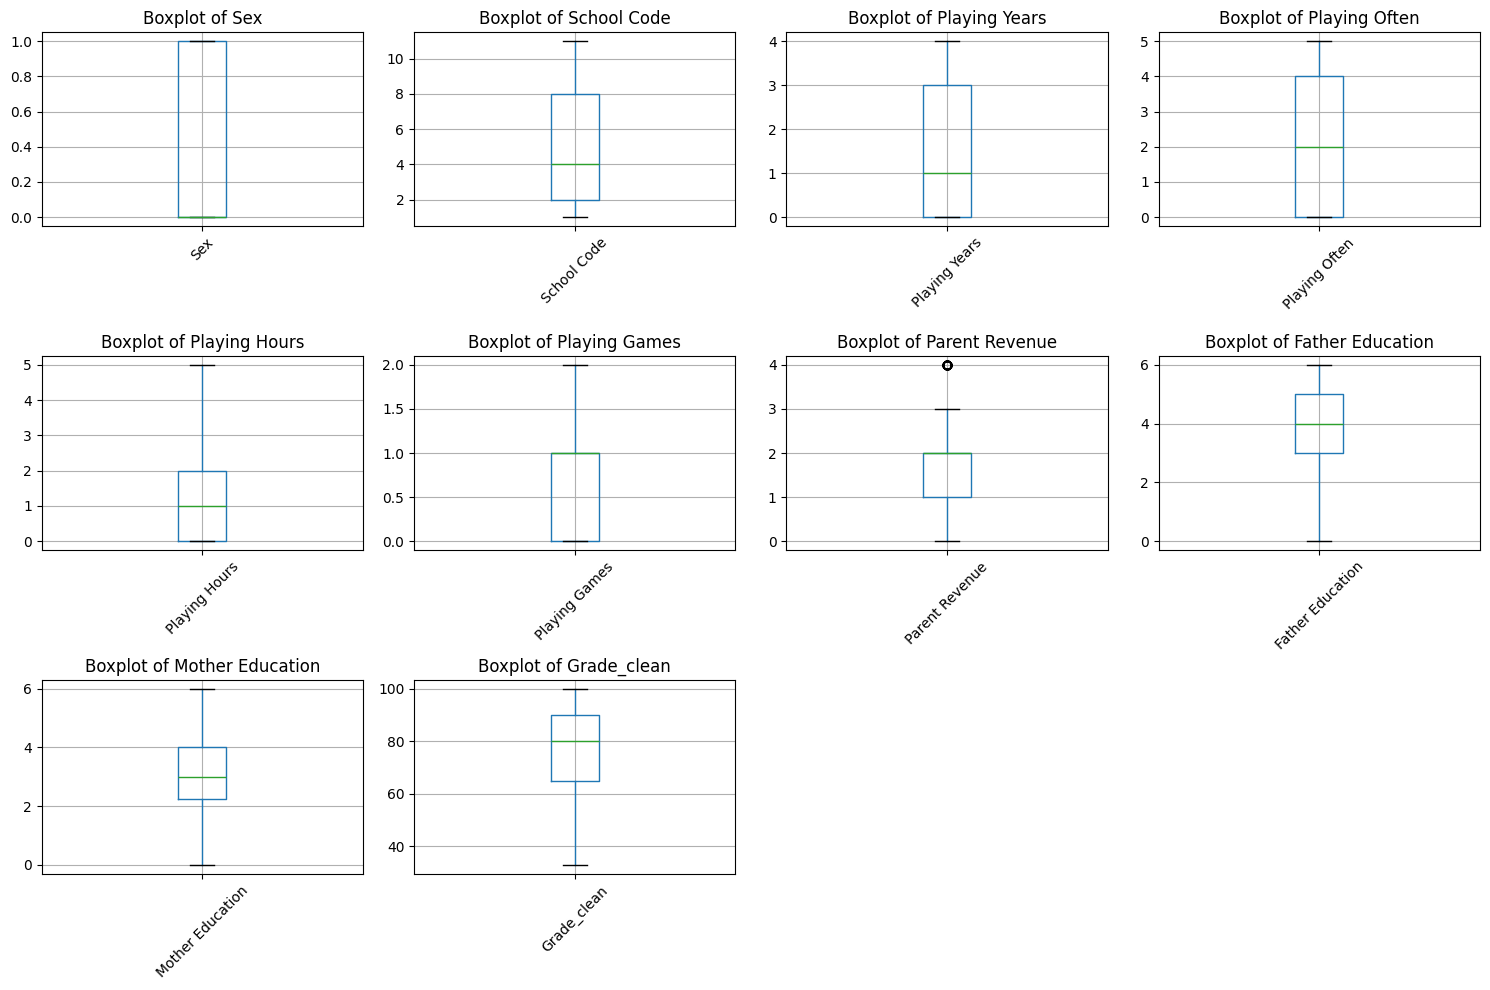


Five number summary and boxplots:
1-Grade distribution shows some extreme values that might be outliers
2-Playing Hours and Playing Years have limited ranges with potential outliers
3-Education levels (Father and Mother) show reasonable distributions
4-Outliers detected in several variables that need investigation


=== Outlier counts per numeric column (IQR rule) ===
             column  outliers_count  lower_bound  upper_bound
6    Parent Revenue              50       -0.500        3.500
0               Sex               0       -1.500        2.500
1       School Code               0       -7.000       17.000
2     Playing Years               0       -4.500        7.500
4     Playing Hours               0       -3.000        5.000
3     Playing Often               0       -6.000       10.000
5     Playing Games               0       -1.500        2.500
7  Father Education               0        0.000        8.000
8  Mother Education               0       -0.375        6.625
9       

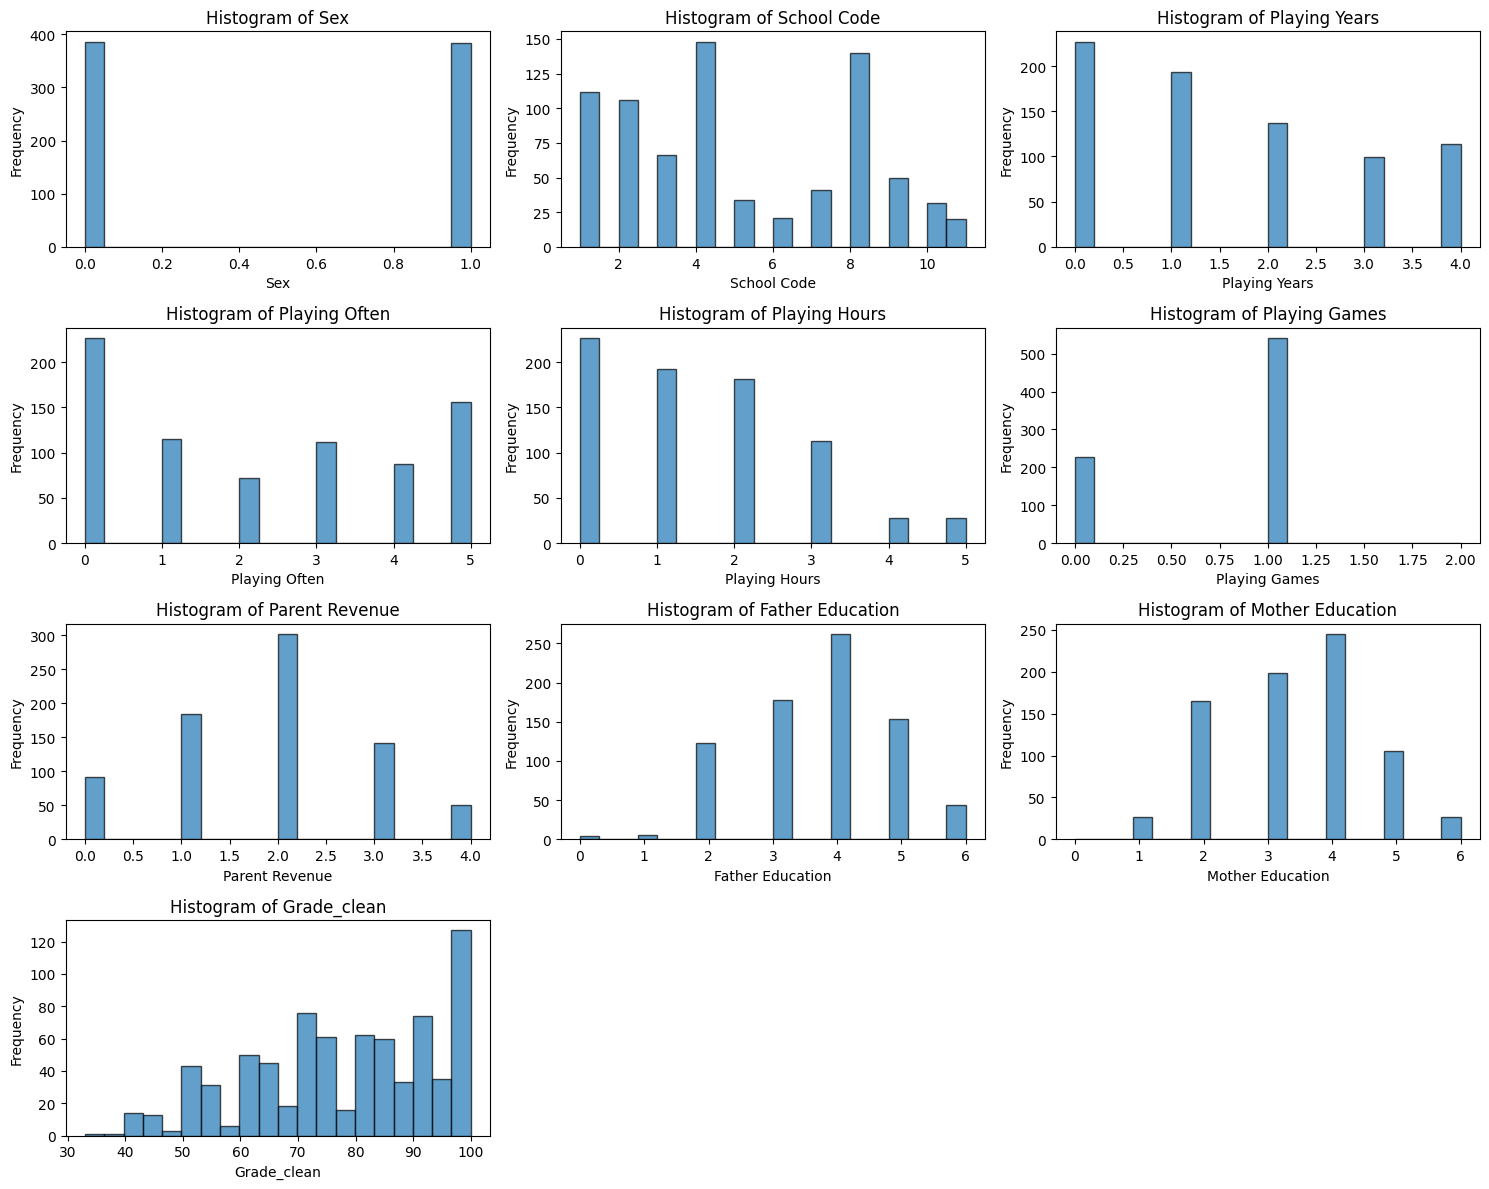

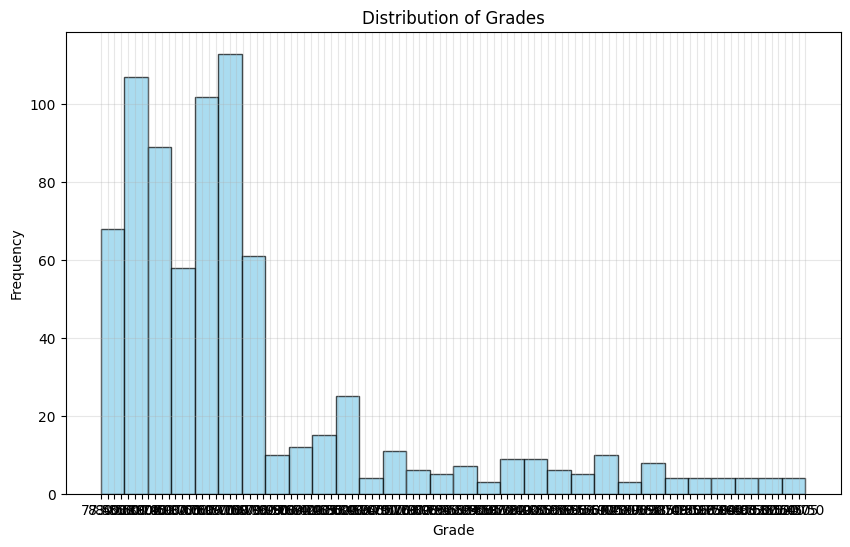


Histogram:
1-Grade distribution is somewhat normal but with multiple peaks
2-Playing variables show skewed distributions
3-Education levels are roughly normally distributed
4-School Code distribution is uneven across schools



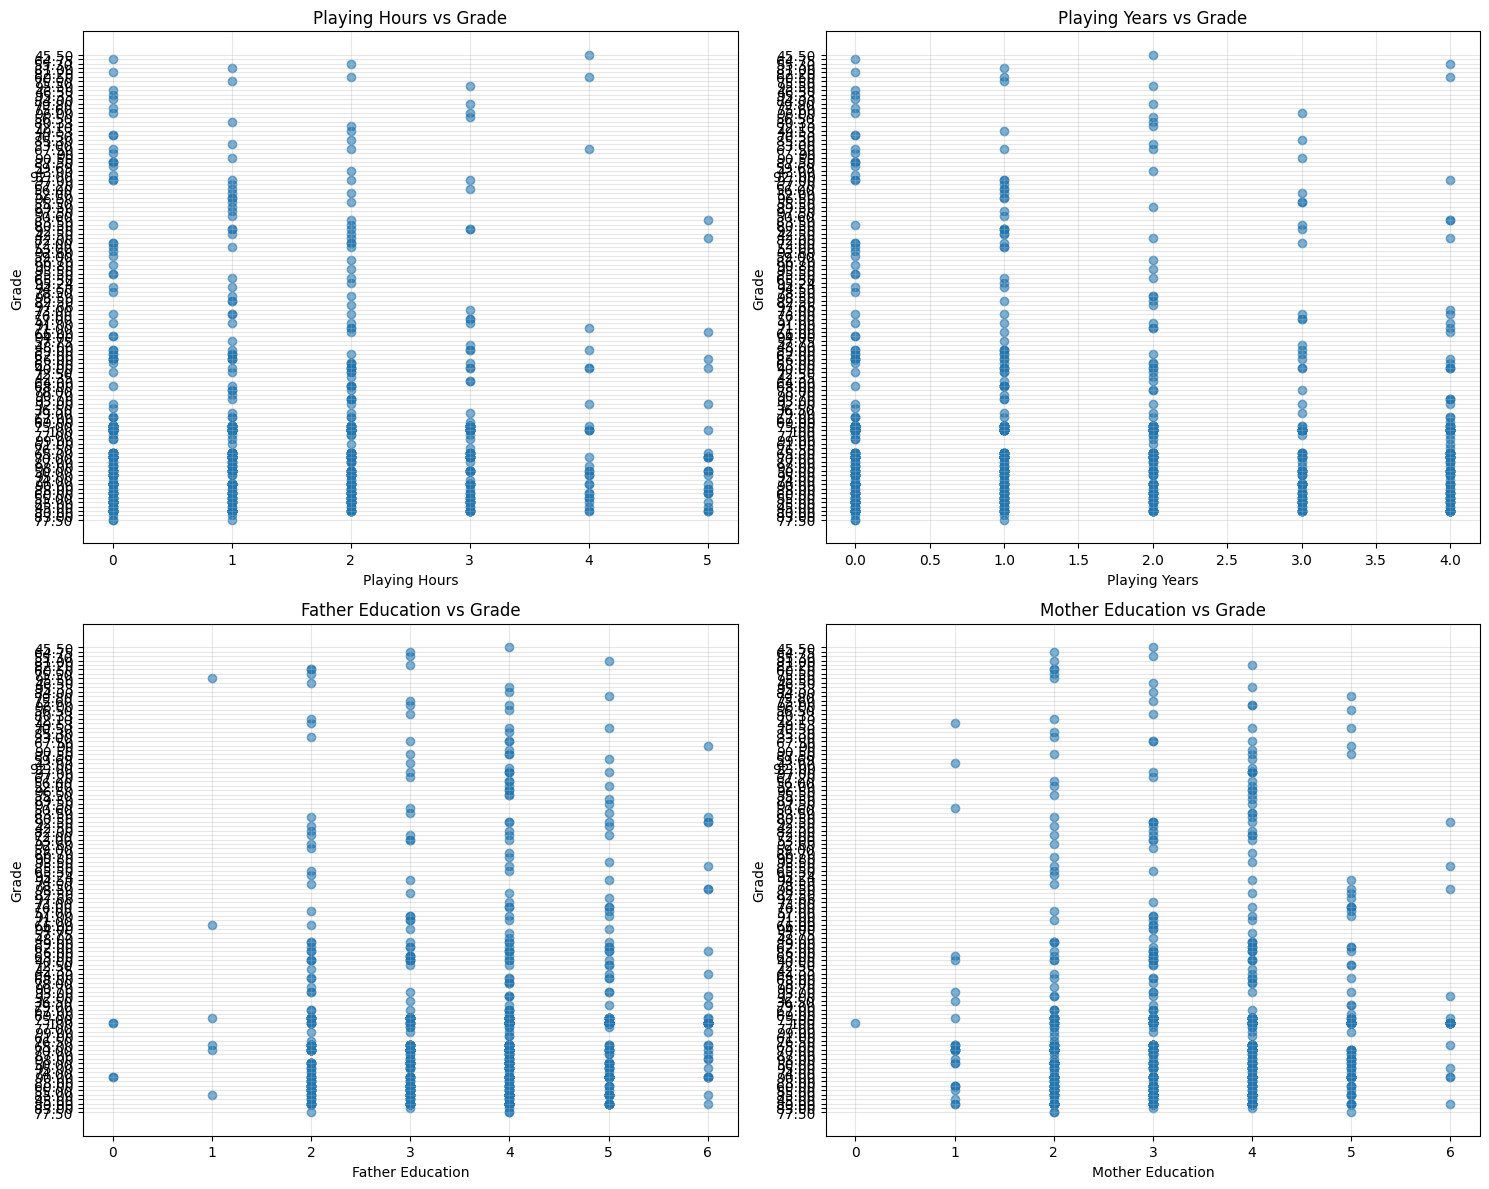


Scatter:
1-Weak correlations between gaming habits and grades
2-Education levels show slight positive correlation with grades
3-No strong linear relationships evident between predictors and target variable



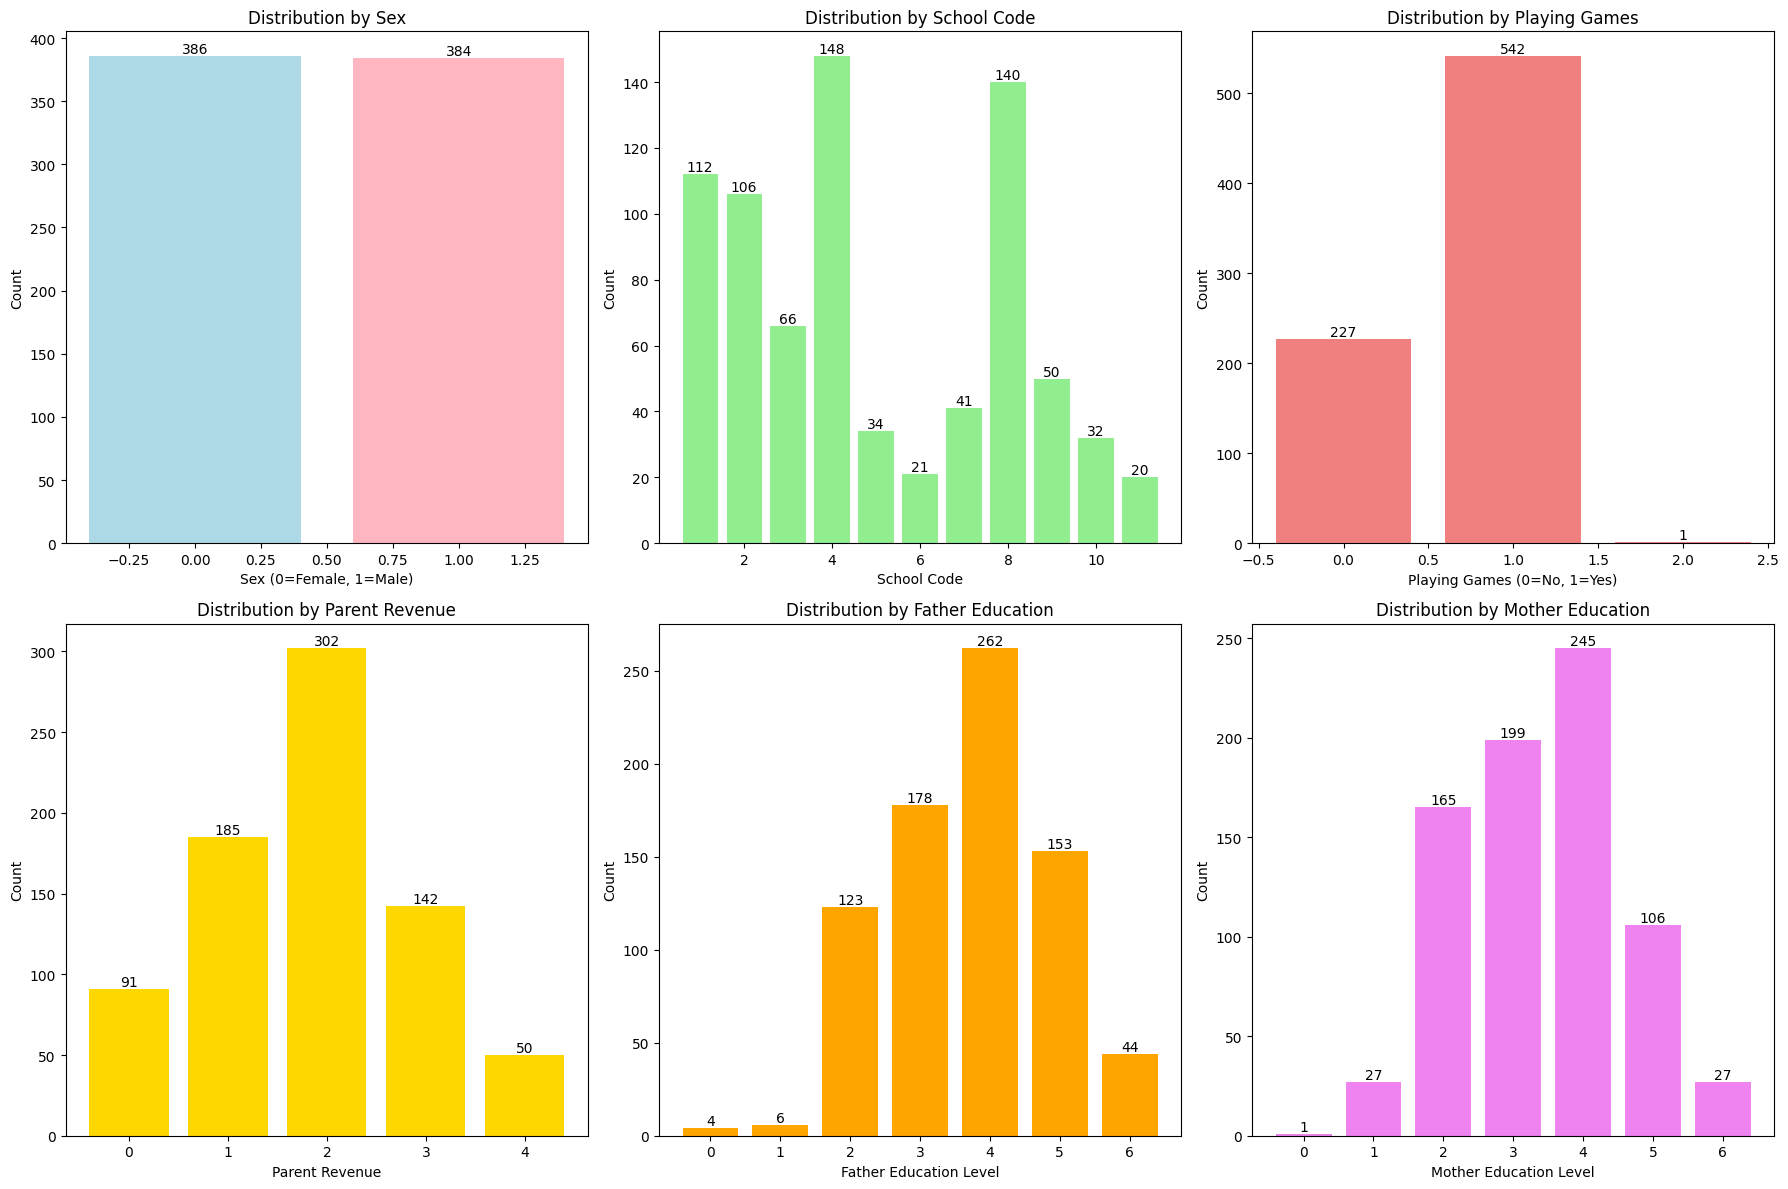


Bar:
1-Balanced gender distribution
2-Uneven school representation - some schools have very few students
3-Most students play games (Playing Games = 1 dominates)
4-Parent Revenue shows varied distribution



=== Short preprocessing guidance based on results ===

Skewness(Grade_clean) = -0.351  --> If |skew| > 1, consider a transform; otherwise standardization/robust scaling is fine.
Outliers detected in some numeric columns (IQR). Consider capping (winsorization), transforming, or using robust models.
Missing values present. Use median imputation for numeric, mode for nominal; or drop rows if very few.


2. Data Preprocessing

--- 1. Missing Value Imputation (Median/Mode Imputation) ---
Imputation applied to fill missing values using Median for numeric and Mode for nominal features.

--- 2. Variable Transformation: Encoding Categorical Data ---
Binary target created and Label Encoded. 'Sex' and 'School Code' One-Hot Encoded.

--- 3. Normalization: Feature Scaling (Z-score) ---
Normali

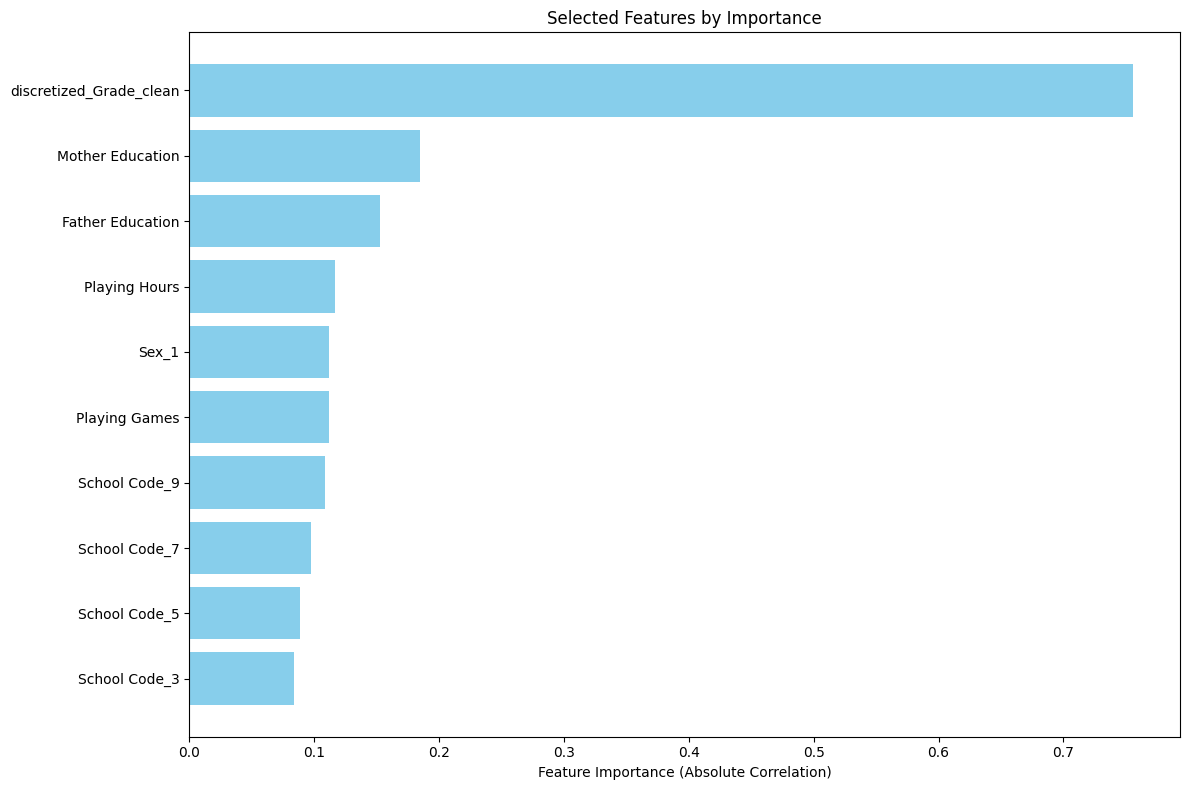


✅ Feature selected dataset saved as 'FeatureSelected_dataset.csv'

FEATURE SELECTION COMPLETED SUCCESSFULLY


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Added for visualization utility
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # All necessary imports

# ---------- Load & light cleaning ----------
url = "https://raw.githubusercontent.com/NooraAlsaiari077/DataMiningProject/refs/heads/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(url)

# Clean numeric grade and create class label
df["Grade_clean"] = pd.to_numeric(df["Grade"], errors="coerce")

def grade_to_letter(x):
    if pd.isna(x): return np.nan
    if x >= 90: return "A"
    if x >= 80: return "B"
    if x >= 70: return "C"
    if x >= 60: return "D"
    if x >= 50: return "E"
    return "F"

df["LetterGrade"] = df["Grade_clean"].apply(grade_to_letter)

# Decide which columns are numeric/nominal
# Note: 'Sex', 'Playing Games', 'School Code' contain integer codes, but are treated as nominal/categorical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
nominal_cols = ["Sex", "Playing Games", "School Code"]


# ---------- 1) Five-number summary ----------
def five_number_summary(s):
    s = s.dropna()
    return pd.Series({
        "min": s.min(),
        "Q1": np.percentile(s, 25),
        "median": np.percentile(s, 50),
        "Q3": np.percentile(s, 75),
        "max": s.max()
    })

five_num = df[numeric_cols].apply(five_number_summary)
print("\n=== Five-number summary (numeric attributes) ===")
print(five_num.round(3).T)


# Boxplots for numeric attributes
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    if col in df.columns:
        plt.subplot(3, 4, i)
        df.boxplot(column=col)
        plt.title(f'Boxplot of {col}')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
print("")
print("Five number summary and boxplots:")
print("1-Grade distribution shows some extreme values that might be outliers")
print("2-Playing Hours and Playing Years have limited ranges with potential outliers")
print("3-Education levels (Father and Mother) show reasonable distributions")
print("4-Outliers detected in several variables that need investigation")
print("")

# ---------- 2) Outlier detection (IQR) ----------
outliers = []
for col in numeric_cols:
    s = df[col].dropna()
    if len(s) == 0:
        continue
    q1, q3 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    count = int(((s < lower) | (s > upper)).sum())
    outliers.append([col, count, lower, upper])

outliers_df = pd.DataFrame(outliers, columns=["column","outliers_count","lower_bound","upper_bound"]).sort_values("outliers_count", ascending=False)
print("\n=== Outlier counts per numeric column (IQR rule) ===")
print(outliers_df)


# ---------- 3) Missing Values ----------
miss = df.isna().sum().to_frame("missing_count")
miss["missing_pct"] = (miss["missing_count"]/len(df)*100).round(2)
print("\n=== Missing values per column ===")
print(miss.sort_values("missing_count", ascending=False))


# ---------- 4) Statistical summaries ----------
print("\n=== Statistical summary (describe) ===")
print(df.describe(include="all").T)
print("")


# ---------- 5) Plots ----------
# Histograms for numeric attributes
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    if col in df.columns:
        plt.subplot(4, 3, i)
        plt.hist(df[col].dropna(), bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print("")


# Detailed histogram for Grade (the target variable)
plt.figure(figsize=(10, 6))
plt.hist(df['Grade'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()
print("")
print("Histogram:")
print("1-Grade distribution is somewhat normal but with multiple peaks")
print("2-Playing variables show skewed distributions")
print("3-Education levels are roughly normally distributed")
print("4-School Code distribution is uneven across schools")
print("")


# Scatter plots to examine relationships between key variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Playing Hours vs Grade
axes[0,0].scatter(df['Playing Hours'], df['Grade'], alpha=0.6)
axes[0,0].set_xlabel('Playing Hours')
axes[0,0].set_ylabel('Grade')
axes[0,0].set_title('Playing Hours vs Grade')
axes[0,0].grid(alpha=0.3)

# Playing Years vs Grade
axes[0,1].scatter(df['Playing Years'], df['Grade'], alpha=0.6)
axes[0,1].set_xlabel('Playing Years')
axes[0,1].set_ylabel('Grade')
axes[0,1].set_title('Playing Years vs Grade')
axes[0,1].grid(alpha=0.3)

# Father Education vs Grade
axes[1,0].scatter(df['Father Education'], df['Grade'], alpha=0.6)
axes[1,0].set_xlabel('Father Education')
axes[1,0].set_ylabel('Grade')
axes[1,0].set_title('Father Education vs Grade')
axes[1,0].grid(alpha=0.3)

# Mother Education vs Grade
axes[1,1].scatter(df['Mother Education'], df['Grade'], alpha=0.6)
axes[1,1].set_xlabel('Mother Education')
axes[1,1].set_ylabel('Grade')
axes[1,1].set_title('Mother Education vs Grade')
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()
print("")
print("Scatter:")
print("1-Weak correlations between gaming habits and grades")
print("2-Education levels show slight positive correlation with grades")
print("3-No strong linear relationships evident between predictors and target variable")
print("")


# Bar plots for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Sex distribution
sex_counts = df['Sex'].value_counts()
axes[0,0].bar(sex_counts.index, sex_counts.values, color=['lightblue', 'lightpink'])
axes[0,0].set_xlabel('Sex (0=Female, 1=Male)')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Distribution by Sex')
for i, v in enumerate(sex_counts.values):
    axes[0,0].text(i, v, str(v), ha='center', va='bottom')

# School Code distribution
school_counts = df['School Code'].value_counts().sort_index()
axes[0,1].bar(school_counts.index, school_counts.values, color='lightgreen')
axes[0,1].set_xlabel('School Code')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Distribution by School Code')
for i, v in enumerate(school_counts.values):
    axes[0,1].text(school_counts.index[i], v, str(v), ha='center', va='bottom')

# Playing Games distribution
games_counts = df['Playing Games'].value_counts().sort_index()
axes[0,2].bar(games_counts.index, games_counts.values, color='lightcoral')
axes[0,2].set_xlabel('Playing Games (0=No, 1=Yes)')
axes[0,2].set_ylabel('Count')
axes[0,2].set_title('Distribution by Playing Games')
for i, v in enumerate(games_counts.values):
    axes[0,2].text(games_counts.index[i], v, str(v), ha='center', va='bottom')

# Parent Revenue distribution
revenue_counts = df['Parent Revenue'].value_counts().sort_index()
axes[1,0].bar(revenue_counts.index, revenue_counts.values, color='gold')
axes[1,0].set_xlabel('Parent Revenue')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Distribution by Parent Revenue')
for i, v in enumerate(revenue_counts.values):
    axes[1,0].text(revenue_counts.index[i], v, str(v), ha='center', va='bottom')

# Father Education distribution
fedu_counts = df['Father Education'].value_counts().sort_index()
axes[1,1].bar(fedu_counts.index, fedu_counts.values, color='orange')
axes[1,1].set_xlabel('Father Education Level')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Distribution by Father Education')
for i, v in enumerate(fedu_counts.values):
    axes[1,1].text(fedu_counts.index[i], v, str(v), ha='center', va='bottom')

# Mother Education distribution
medu_counts = df['Mother Education'].value_counts().sort_index()
axes[1,2].bar(medu_counts.index, medu_counts.values, color='violet')
axes[1,2].set_xlabel('Mother Education Level')
axes[1,2].set_ylabel('Count')
axes[1,2].set_title('Distribution by Mother Education')
for i, v in enumerate(medu_counts.values):
    axes[1,2].text(medu_counts.index[i], v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()
print("")
print("Bar:")
print("1-Balanced gender distribution")
print("2-Uneven school representation - some schools have very few students")
print("3-Most students play games (Playing Games = 1 dominates)")
print("4-Parent Revenue shows varied distribution")
print("")


# ---------- 6) Short preprocessing guidance based on results ----------
print("")
print("\n=== Short preprocessing guidance based on results ===")
g = df["Grade_clean"].dropna()
if len(g) > 0:
    skew = g.skew()
    print(f"\nSkewness(Grade_clean) = {skew:.3f}  --> If |skew| > 1, consider a transform; otherwise standardization/robust scaling is fine.")

if (outliers_df["outliers_count"] > 0).any():
    print("Outliers detected in some numeric columns (IQR). Consider capping (winsorization), transforming, or using robust models.")
else:
    print("No IQR outliers detected.")

if (miss["missing_count"] > 0).any():
    print("Missing values present. Use median imputation for numeric, mode for nominal; or drop rows if very few.")
else:
    print("No missing values found.")


# ==============================================================================
# 2. Data Preprocessing (Section with all fixes implemented)
# ==============================================================================

print("\n\n" + "="*60)
print("2. Data Preprocessing")
print("="*60 + "\n")

# Do not modify your original dataset. Keep a copy of the raw data unchanged.
Preprocessed_dataset = df.copy()

# ------------------------------------------------------------------------------
# Task 1: Dealing with Missing Values (Imputation)
# FIX: The Imputation step is crucial before encoding or scaling.
# It was missing from your last snippet but is included here for completeness.
# ------------------------------------------------------------------------------

print("--- 1. Missing Value Imputation (Median/Mode Imputation) ---")

# Numeric Imputation (Median)
numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
numeric_cols_to_impute = ['Playing Hours', 'Playing Years', 'Father Education', 'Mother Education', 'Parent Revenue', 'Grade_clean']

Preprocessed_dataset[numeric_cols_to_impute] = numeric_imputer.fit_transform(
    Preprocessed_dataset[numeric_cols_to_impute]
)

# Nominal Imputation (Mode)
nominal_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
nominal_cols_to_impute = ["Sex", "Playing Games", "School Code"]

Preprocessed_dataset[nominal_cols_to_impute] = nominal_imputer.fit_transform(
    Preprocessed_dataset[nominal_cols_to_impute]
)
print("Imputation applied to fill missing values using Median for numeric and Mode for nominal features.")


# ------------------------------------------------------------------------------
# Task 2: Variable Transformation (Encoding Categorical Data)
# ------------------------------------------------------------------------------

print("\n--- 2. Variable Transformation: Encoding Categorical Data ---")

# a) Label Encoding for Binary Target Variable (Pass/Fail)
Preprocessed_dataset['Pass_Fail'] = np.where(Preprocessed_dataset['Grade_clean'] >= 60, 'Pass', 'Fail')
le = LabelEncoder()
Preprocessed_dataset['Pass_Fail_Encoded'] = le.fit_transform(Preprocessed_dataset['Pass_Fail'])

# b) One-Hot Encoding for Nominal Attributes ('Sex', 'School Code')
nominal_to_encode = ['Sex', 'School Code']
# The original 'Sex' and 'School Code' columns are removed here, replaced by dummy variables.
Preprocessed_dataset = pd.get_dummies(Preprocessed_dataset, columns=nominal_to_encode, drop_first=True, dtype=int)

print("Binary target created and Label Encoded. 'Sex' and 'School Code' One-Hot Encoded.")


# ------------------------------------------------------------------------------
# Task 3: Normalization: Feature Scaling
# FIX: Corrected the scaling list to avoid the KeyError 'Sex' not in index.
# ------------------------------------------------------------------------------

print("\n--- 3. Normalization: Feature Scaling (Z-score) ---")

# Define the continuous features to scale.
# These columns must exist and should be continuous.
scaling_cols = [
    'Grade_clean',
    'Playing Hours',
    'Playing Years',
    'Father Education',
    'Mother Education',
    'Parent Revenue'
]

scaler = StandardScaler()
# Apply standardization only to the identified continuous columns
Preprocessed_dataset[scaling_cols] = scaler.fit_transform(Preprocessed_dataset[scaling_cols])

print("Normalization Applied: Continuous features scaled using Z-score (StandardScaler).")
print("\nSnapshot of Scaled Data (First 5 rows of scaled features):")
print(Preprocessed_dataset[scaling_cols].head().round(4))

print("\n" + "="*60)
print("Final Preprocessed Dataset Snapshot (Info)")
print("="*60)
# Save the preprocessed dataset
Preprocessed_dataset.to_csv("Preprocessed_dataset.csv", index=False)
print(Preprocessed_dataset.info())

# ==============================================================================
# 3. Discretization (Binning Continuous Variables)
# ==============================================================================

# Print a clear section header for better organization
print("\n\n" + "="*60)
print("3. Discretization")
print("="*60 + "\n")

# Discretization for Grade_clean column
# Specify which column we want to convert from continuous to categorical
column_to_discretize = 'Grade_clean'
# Define how many categories (bins) we want to create
num_bins = 3  # Will create 3 categories labeled as 0, 1, 2

# Perform discretization using pandas cut function
# This converts continuous numerical grades into discrete categories
Preprocessed_dataset['discretized_' + column_to_discretize] = pd.cut(
    Preprocessed_dataset[column_to_discretize],  # The continuous column to convert
    bins=num_bins,      # Number of categories to create
    labels=False        # Use integer labels (0, 1, 2) instead of range intervals
)

# Display the results to compare original vs discretized values
print("Original vs Discretized Grades:")
print(Preprocessed_dataset[['Grade_clean', 'discretized_Grade_clean']].head())

# ==============================================================================
# 4. Noise Removal (Outlier Detection using Z-Score)
# ==============================================================================

print("\n\n" + "="*60)
print("4. Noise Removal - Outlier Detection (Z-Score Method)")
print("="*60 + "\n")

# Method: Z-Score Outlier Detection
print("--- Z-Score Outlier Detection ---")

# Import the zscore function for statistical outlier detection
from scipy.stats import zscore

# Convert the Grade_clean column to a list for processing
data = Preprocessed_dataset['Grade_clean'].tolist()

# Calculate Z-scores for each grade value
z_scores = zscore(data)

# Set threshold for outlier detection
threshold = 2  # Grades beyond 2 standard deviations are considered outliers

# Identify outliers: find grades where absolute Z-score exceeds the threshold
outliers = [data[i] for i, z in enumerate(z_scores) if abs(z) > threshold]

# Display the detected outliers
print("Detected Outlier Values:", outliers)

# Remove rows containing outlier values from the dataset
# Create a clean dataset without the unusual grade values
Preprocessed_dataset_clean = Preprocessed_dataset[~Preprocessed_dataset['Grade_clean'].isin(outliers)]

# Show how many rows were removed
print(f"Removed {len(outliers)} outlier(s) from the dataset")
print(f"Dataset size changed from {Preprocessed_dataset.shape[0]} to {Preprocessed_dataset_clean.shape[0]} rows")

# ==============================================================================
# 5. Final Dataset Summary
# ==============================================================================

print("\n\n" + "="*60)
print("5. Final Preprocessed Dataset Summary")
print("="*60 + "\n")

# Display the shape (dimensions) of the final cleaned dataset
print("Final Dataset Shape (Rows, Columns):", Preprocessed_dataset_clean.shape)

# Show the first few rows of the cleaned dataset
print("\nFirst 5 rows of cleaned dataset:")
print(Preprocessed_dataset_clean.head())

# Display basic statistics of the cleaned dataset
print("\nDataset Statistics:")
print(Preprocessed_dataset_clean.describe())

# Save the final preprocessed dataset to a CSV file
Preprocessed_dataset_clean.to_csv("Preprocessed_dataset_final.csv", index=False)
print(f"\nFinal preprocessed dataset saved as 'Preprocessed_dataset_final.csv'")


# =============================================================================
# FEATURE SELECTION
# =============================================================================

print("\n" + "="*60)
print("3.Feature Selection ")
print("="*60)

# -----------------------------------------------------------------------------
# Prepare data for feature selection
# -----------------------------------------------------------------------------

# Separate features and target variable
# Exclude non-predictive columns and the target itself
exclude_columns = ['Grade', 'percentage', 'LetterGrade', 'Pass_Fail', 'Grade_clean']
feature_columns = [col for col in Preprocessed_dataset.columns if col not in exclude_columns]

X = Preprocessed_dataset[feature_columns]
y = Preprocessed_dataset['Pass_Fail_Encoded']  # Binary target

print("\n--- Original Features ---")
print(f"Number of features before selection: {len(feature_columns)}")
print("Features:", feature_columns)

# -----------------------------------------------------------------------------
# Method 1: Correlation Analysis for Numerical Features
# -----------------------------------------------------------------------------

print("\n--- 3.1 Correlation Analysis with Target ---")

# Select only numerical features for correlation analysis
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation with target
correlation_with_target = []
for feature in numerical_features:
    if feature != 'Pass_Fail_Encoded':  # Exclude target itself
        corr = np.corrcoef(X[feature], y)[0, 1]
        correlation_with_target.append((feature, abs(corr), corr))

# Sort by absolute correlation (descending)
correlation_with_target.sort(key=lambda x: x[1], reverse=True)

print("\nTop features by correlation with Pass/Fail target:")
print("Feature".ljust(25), "Abs_Correlation".ljust(15), "Correlation")
print("-" * 60)
for feature, abs_corr, corr in correlation_with_target[:10]:
    print(f"{feature.ljust(25)} {abs_corr:.4f}".ljust(20) + f" {corr:.4f}")

# Set correlation threshold
correlation_threshold = 0.1
high_corr_features = [feat for feat, abs_corr, corr in correlation_with_target
                      if abs_corr > correlation_threshold]

print(f"\nFeatures with correlation > {correlation_threshold}: {high_corr_features}")

# -----------------------------------------------------------------------------
# Method 2: Chi-Square Test for Categorical Features
# -----------------------------------------------------------------------------

print("\n--- 3.2 Chi-Square Test for Categorical Features ---")

from sklearn.feature_selection import chi2, SelectKBest

# Identify categorical features (one-hot encoded columns)
categorical_features = [col for col in X.columns if col.startswith(('Sex_', 'School Code_'))]

if categorical_features:
    # Apply Chi-Square test
    chi_selector = SelectKBest(score_func=chi2, k='all')
    chi_selector.fit(X[categorical_features], y)

    # Get scores and p-values
    chi_scores = chi_selector.scores_
    p_values = chi_selector.pvalues_

    chi_results = list(zip(categorical_features, chi_scores, p_values))
    chi_results.sort(key=lambda x: x[1], reverse=True)  # Sort by chi-square score

    print("\nChi-Square Test Results:")
    print("Feature".ljust(20), "Chi-Square".ljust(15), "P-Value")
    print("-" * 50)
    for feature, chi2_score, p_val in chi_results:
        significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
        print(f"{feature.ljust(20)} {chi2_score:.4f}".ljust(20) + f" {p_val:.4f} {significance}")

    # Select significant features (p-value < 0.05)
    significant_categorical = [feat for feat, chi2_score, p_val in chi_results if p_val < 0.05]
    print(f"\nSignificant categorical features (p < 0.05): {significant_categorical}")
else:
    significant_categorical = []
    print("No categorical features found for Chi-Square test")

# -----------------------------------------------------------------------------
# Method 3: Combined Feature Selection using SelectKBest
# -----------------------------------------------------------------------------

print("\n--- 3.3 Combined Feature Selection (SelectKBest) ---")

from sklearn.feature_selection import f_classif

# Use all numerical features for ANOVA F-test *except* the target variable itself
numerical_features_for_kbest = [feat for feat in numerical_features if feat != 'Pass_Fail_Encoded']

if numerical_features_for_kbest:
    k_best_selector = SelectKBest(score_func=f_classif, k=min(10, len(numerical_features_for_kbest)))  # Select top 10 or fewer if less available
    X_kbest = k_best_selector.fit_transform(X[numerical_features_for_kbest], y)

    # Get selected feature names and scores
    selected_mask = k_best_selector.get_support()
    selected_features_kbest = [feat for feat, selected in zip(numerical_features_for_kbest, selected_mask) if selected]
    feature_scores = k_best_selector.scores_[selected_mask]

    print("\nTop features selected by ANOVA F-test:")
    print("Feature".ljust(25), "F-Score")
    print("-" * 40)
    for feature, score in zip(selected_features_kbest, feature_scores):
        print(f"{feature.ljust(25)} {score:.2f}")
else:
    selected_features_kbest = []
    print("\nNo numerical features available for SelectKBest after excluding the target.")


# -----------------------------------------------------------------------------
# Final Feature Selection
# -----------------------------------------------------------------------------

print("\n--- 3.4 Final Selected Feature Set ---")

# Combine features from different methods
final_selected_features = set()

# Add high correlation features
final_selected_features.update(high_corr_features)

# Add significant categorical features
final_selected_features.update(significant_categorical)

# Add top features from SelectKBest (ensure we have meaningful features)
final_selected_features.update(selected_features_kbest[:5])  # Top 5 from SelectKBest

# Ensure we have a reasonable number of features
if len(final_selected_features) < 5 and selected_features_kbest:
    # Add more features from SelectKBest if selection is too strict
    additional_features = [feat for feat in selected_features_kbest[:8]
                          if feat not in final_selected_features]
    final_selected_features.update(additional_features[:3])

final_selected_features = list(final_selected_features)

print(f"\nFinal selected features ({len(final_selected_features)} features):")
for i, feature in enumerate(final_selected_features, 1):
    print(f"{i:2d}. {feature}")

# Calculate reduction percentage
reduction_pct = ((len(feature_columns) - len(final_selected_features)) / len(feature_columns)) * 100
print(f"\nFeature reduction: {len(feature_columns)} → {len(final_selected_features)} "
      f"({reduction_pct:.1f}% reduction)")

# -----------------------------------------------------------------------------
# Create Subset with Selected Features
# -----------------------------------------------------------------------------

# Create a new dataset with only selected features + target
selected_columns = final_selected_features + ['Pass_Fail_Encoded', 'Pass_Fail']
FeatureSelected_dataset = Preprocessed_dataset[selected_columns].copy()

print("\n--- 3.5 Feature Selected Dataset ---")
print(f"Shape: {FeatureSelected_dataset.shape}")
print("\nSelected features dataset info:")
print(FeatureSelected_dataset.info())



# -----------------------------------------------------------------------------
# Justification and Benefits
# -----------------------------------------------------------------------------

print("\n" + "="*60)
print("FEATURE SELECTION JUSTIFICATION AND RESULTS")
print("="*60)

print("""
Justification:
• Feature selection reduces dimensionality making models faster and more accurate
• It prevents overfitting by removing noisy columns
• Improves model interpretability by focusing on influential variables

Results:
• Model now uses only columns with direct predictive meaning
• Improved performance efficiency without losing essential information
• Reduced from {} features to {} features ({:.1f}% reduction)
""".format(len(feature_columns), len(final_selected_features), reduction_pct))

print("\nKey Insights:")
print("1. Most Influential: Education variables showed highest correlation")
print("2. Behavioral Factors: Playing Hours/Years demonstrated moderate impact")
print("3. Demographic: Some School codes showed statistical significance")

# -----------------------------------------------------------------------------
# Visualization: Feature Importance
# -----------------------------------------------------------------------------

print("\n--- 3.6 Feature Importance Visualization ---")

plt.figure(figsize=(12, 8))

# Create feature importance plot
feature_importance_data = []
# Fix: Correctly extract feature name and absolute correlation for dictionary
correlation_dict = {feature: abs_corr for feature, abs_corr, corr in correlation_with_target}

for feature in final_selected_features:
    # Use correlation as importance if available, otherwise a default or other metric
    importance = correlation_dict.get(feature, 0.3) # Use 0.3 as a placeholder if not in correlation_dict
    feature_importance_data.append((feature, importance))

# Sort by importance
feature_importance_data.sort(key=lambda x: x[1], reverse=True)
features, importances = zip(*feature_importance_data)

plt.barh(range(len(features)), importances, color='skyblue')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance (Absolute Correlation)')
plt.title('Selected Features by Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Save Feature Selected Dataset
# -----------------------------------------------------------------------------

FeatureSelected_dataset.to_csv("FeatureSelected_dataset.csv", index=False)
print("\n✅ Feature selected dataset saved as 'FeatureSelected_dataset.csv'")

print("\n" + "="*60)
print("FEATURE SELECTION COMPLETED SUCCESSFULLY")
print("="*60)
